In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Qu'est-ce qu'un ECG

Un ECG est un √©lectrocardiogramme, c'est un test m√©dical qui enregistre l'activit√© du c≈ìur.

Le fonctionnement de cette examen consiste √† placer des electrodes sur la peau.
Les √©lectrodes captent les impulsions √©lectriques du coeur.

Les √©lectrodes d√©tectent les signaux √©lectriques √©misent par les contractions cardiaque et les transmettent √† un appareil qui les trace sous forme de courbes.

In [28]:

# Chargement des datasets
train_data = pd.read_csv('mitbih_train.csv', header=None)
test_data = pd.read_csv('mitbih_test.csv', header=None)

# Fusion des datasets
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Affichage des premi√®res lignes
print(data.head())
print(data.shape)


        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

## Fr√©quence d'√©chantillionnage des donn√©es

Les donn√©es sont √©chantillonn√©es en 187 classes + 1 classe pour labelis√©

Series([], dtype: int64)


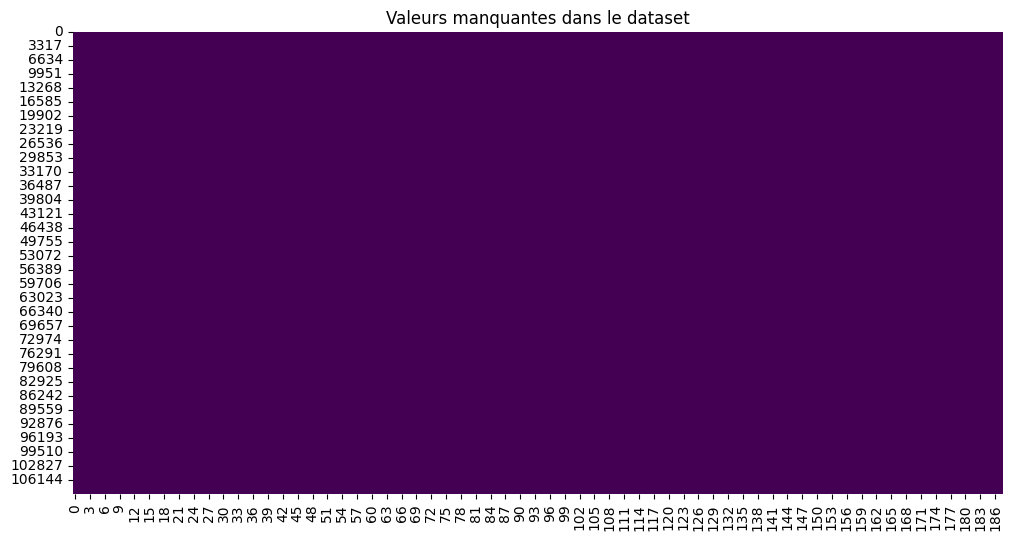

In [29]:
# V√©rification des valeurs manquantes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Visualisation des valeurs manquantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes dans le dataset')
plt.show()


In [30]:
# Suppression des lignes avec des valeurs manquantes (si n√©cessaire)
data_cleaned = data.dropna()

# V√©rification apr√®s suppression
print(data_cleaned.isnull().sum())
print(data_cleaned.shape)


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64
(109446, 188)


In [31]:
# V√©rification et suppression des doublons
data_no_duplicates = data_cleaned.drop_duplicates()
print(data_no_duplicates.shape)


(109446, 188)


In [32]:
class_counts = data.iloc[:, -1].value_counts().sort_index()

# Affichage des r√©sultats
print("Nombre d'ECG par classe :")
print(class_counts)

Nombre d'ECG par classe :
187
0.0    90589
1.0     2779
2.0     7236
3.0      803
4.0     8039
Name: count, dtype: int64


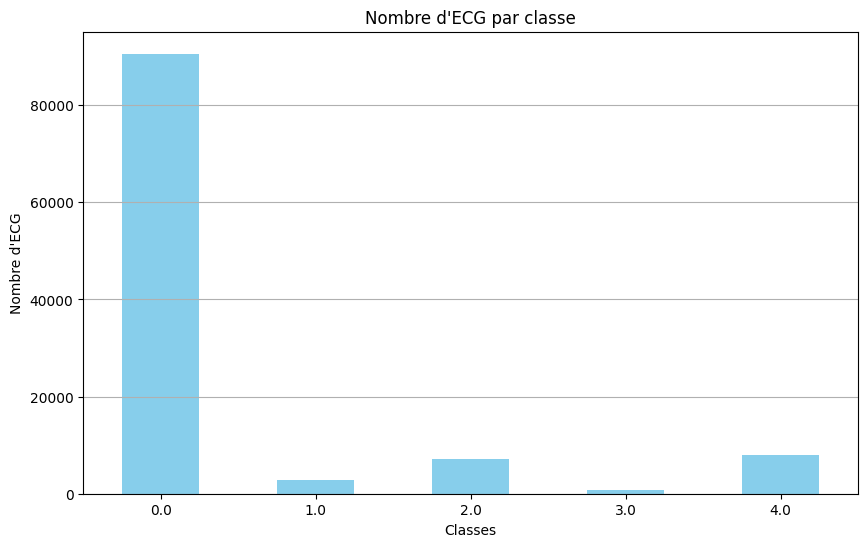

In [33]:
# Visualisation des occurrences par classe
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'ECG par classe')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'ECG')
plt.xticks(rotation=0)  # Rotation des labels de classe
plt.grid(axis='y')
plt.show()


In [34]:
# Afficher les premi√®res lignes du dataset pour comprendre la structure
print(data.head())




        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

## Type de maladie cardiaque par classe

0 : Normal

1 : Supreventricular etctopic beat

2 : Ventricular ectopic beat

3 : Fusion beat

4 : Inconnu

‚Ä¢ Normal : Patient avec un coeur sain


‚Ä¢ Supreventricular Etctopic Beat : Battement cardiaque pr√©matur√© provenant des oreillettes per√ßu comme des 

palpitations.

Cela peut augmenter le risque d‚ÄôAVC ou d‚Äôinsuffisance cardiaque si l‚Äôarythmie devient persistante


‚Ä¢ Ventricular Ectopic Beat : Battement cardiaque anormal qui prend naissance dans les ventricules, souvent per√ßu 

comme une palpitation.

Le risque principale est que la maladie √©volue en arythmies plus graves, comme la tachycardie ventriculaire ou m√™me 

la fibrillation ventriculaire.


‚Ä¢ Fusion Beat : Battement cardiaque issu de la fusion d'un battement normal et d'un battement ectopique (anormal), 

r√©sultant en une contraction combin√©e qui peut refl√©ter un rythme cardiaque perturb√©.

S'il est fr√©quent, il peut indiquer un probl√®me sous-jacent de conduction cardiaque ou √™tre un signe d‚Äôarythmie 

ventriculaire naissante.


‚Ä¢ Inconnu : Maladie inconnu

In [35]:
classes = data.iloc[:, -1]

In [36]:
class_counts = classes.value_counts(normalize=True) * 100


In [37]:
labels = ["Normal", "Supraventricular Ectopic Beat", "Ventricular Ectopic Beat", "Fusion Beat", "Unknown"]


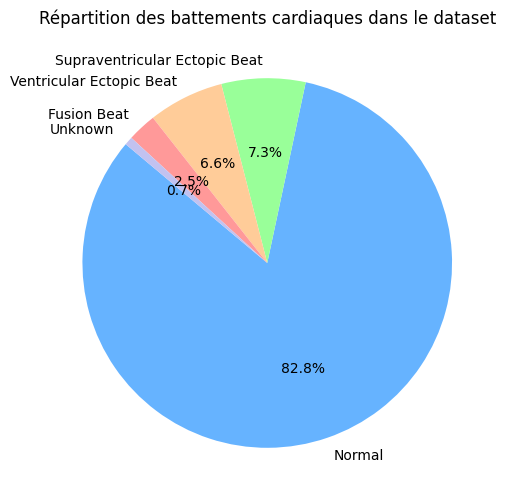

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title("R√©partition des battements cardiaques dans le dataset")
plt.show()

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des donn√©es (assurez-vous que vos donn√©es sont d√©j√† charg√©es)
# data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

# Supposons que la derni√®re colonne (label) contient les classes
labels = data.iloc[:, -1]

# Calcul de la moyenne des signaux par classe, en excluant la derni√®re colonne
mean_signals = data.iloc[:, :-1].groupby(labels).mean()  # Exclut la derni√®re colonne pour le calcul des moyennes

# Configuration de la figure
plt.figure(figsize=(12, 6))

# Tracer une courbe pour chaque classe
for class_label in mean_signals.index:
    plt.plot(mean_signals.columns, mean_signals.loc[class_label], marker='o', label=f'Classe {class_label}')

plt.title('Moyenne des Signaux ECG par Classe (sans dernier signal)')
plt.xlabel('Index des Signaux')
plt.ylabel('Moyenne des Signaux')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Classes')
plt.tight_layout()
plt.show()


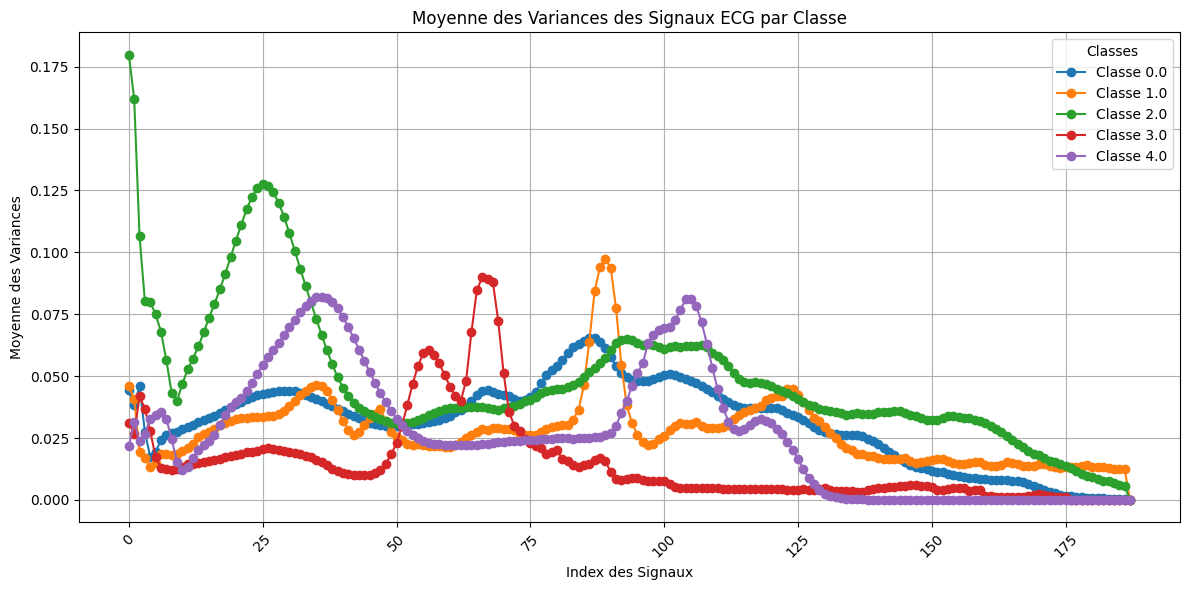

In [45]:
labels = data.iloc[:, -1]

# Calcul de la variance des signaux par classe
variance_signals = data.groupby(labels).var()

# Configuration de la figure
plt.figure(figsize=(12, 6))

# Tracer une courbe pour chaque classe
for class_label in variance_signals.index:
    plt.plot(variance_signals.columns, variance_signals.loc[class_label], marker='o', label=f'Classe {class_label}')

plt.title('Moyenne des Variances des Signaux ECG par Classe')
plt.xlabel('Index des Signaux')
plt.ylabel('Moyenne des Variances')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Classes')
plt.tight_layout()
plt.show()

Tableau de corr√©lation interclasse üòä
          0.0       1.0       2.0       3.0       4.0
0.0       1.0   0.95993  0.928773  0.843749  0.862087
1.0   0.95993       1.0  0.902478  0.777526  0.835784
2.0  0.928773  0.902478       1.0  0.758974  0.929179
3.0  0.843749  0.777526  0.758974       1.0  0.676887
4.0  0.862087  0.835784  0.929179  0.676887       1.0


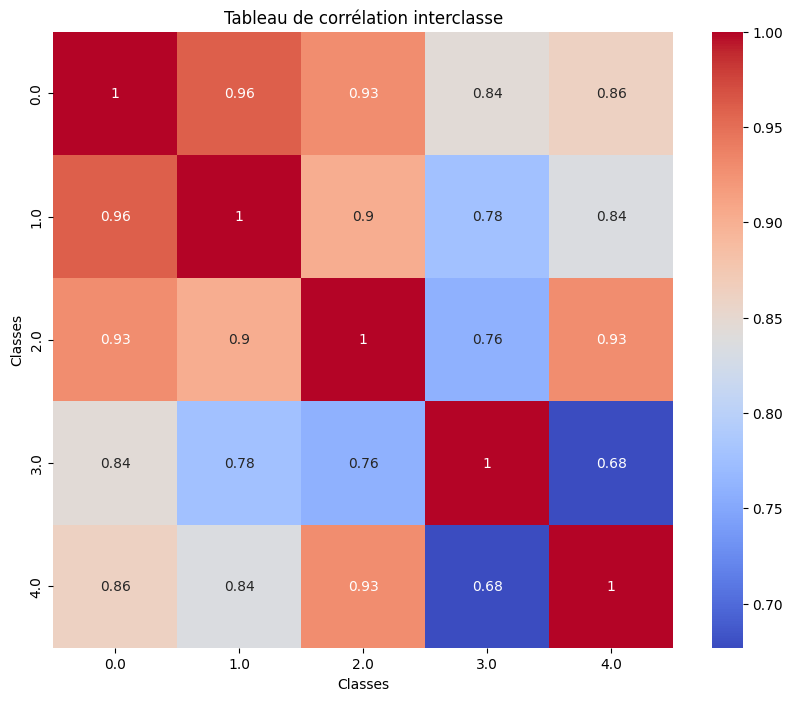

In [57]:
classes = data[187].unique()
correlation_matrix = pd.DataFrame(index=classes, columns=classes)

for class_1 in classes:
    for class_2 in classes:
        # S√©lectionner les donn√©es pour les deux classes
        signals_1 = data[data[187] == class_1].iloc[:, :-1]  # Tout sauf la colonne de classe
        signals_2 = data[data[187] == class_2].iloc[:, :-1]

        # Calculer la moyenne des signaux pour chaque classe
        mean_signals_1 = signals_1.mean()
        mean_signals_2 = signals_2.mean()

        # Calculer la corr√©lation entre les moyennes des signaux
        correlation = mean_signals_1.corr(mean_signals_2)
        correlation_matrix.loc[class_1, class_2] = correlation

#Afficher le tableau de corr√©lation
print("Tableau de corr√©lation interclasse üòä")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", cbar=True)
plt.title("Tableau de corr√©lation interclasse")
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()

## Caract√©ristiques ECG en fonction des maladies

‚Ä¢ Supra-ventricular Ectopic Beat (SVEB) = Le c≈ìur bat de fa√ßon irr√©guli√®re, avec des intervalles parfois plus courts entre les battements.

‚Ä¢ Ventricular Ectopic Beat (VEB) = Rythme du c≈ìur irr√©gulier, avec des battements qui semblent ¬´ interrompus ¬ª.

‚Ä¢ Fusion Beat = Comme si deux battements se ¬´ fusionnaient ¬ª, ce qui donne une forme diff√©rente sur l'ECG.

## Placement des Electrodes pour le projet Arduino

‚Ä¢ Electrode Positive : Bras gauche

‚Ä¢ Electrode N√©gative : Bras droit

‚Ä¢ Electrode de R√©f√©rence : Poitrine au niveau du sternum